# Objectives
In this notebook, we will be addressing subgroup A question 3.

3. What are the most common guest journey patterns, and how do they vary across different segments?
- Analyze and visualize journey patterns across different attractions, times, and guest segments.
- Identify opportunities for personalization and service improvements based on these patterns.

In this notebook, we will explore various aspects of guest journey patterns at a theme park to gain insights into how guests move through attractions, how long they spend at each, and how these patterns vary across guest segments and times of day. Our goal is to identify common behaviors and uncover opportunities for optimizing guest experience and operational efficiency.





In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from collections import Counter

### Journey Patterns
We have identified some key journey patterns that will help us with our analysis. 

1. Attraction-Based Patterns

2. Time-Based Patterns

3. Segment-Specific Patterns


By analyzing these aspects, we aim to reveal the most common guest behaviors, identify potential areas for experience improvement, and create personalized recommendations that align with guests’ preferences and optimize the overall park journey.

In [ ]:
# Load in datasets
survey_data = pd.read_csv('../data/final_synthetic_data.csv')
forecast_data = pd.read_csv('../data/collated_forecasts_per_ride.csv')
hourly_wait_time_data = pd.read_csv('../data/combined_wait_time_df.csv')
daily_wait_time_data = pd.read_csv('../data/daily_avg_wait_time_df.csv')

## 1. Attraction-Based Patterns

**Objective**: Our goal is to analyze guest journey patterns by focusing on the time spent waiting at individual attractions. By measuring wait times at each attraction, we can identify which attractions experience high demand, leading to longer queues. This data helps us understand guest preferences, peak times for each attraction, and potential bottlenecks in the guest journey. High wait times at specific attractions may indicate areas where operational improvements, such as additional staffing or crowd management strategies, could enhance guest flow and reduce overall crowding, leading to a smoother and more enjoyable experience.

C:\Users\damie\AppData\Local\Temp\ipykernel_22384\89164221.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_forecast_data['date'] = pd.to_datetime(filtered_forecast_data['date'], errors='coerce')
C:\Users\damie\AppData\Local\Temp\ipykernel_22384\89164221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_forecast_data['day_of_week'] = filtered_forecast_data['date'].dt.day_name()


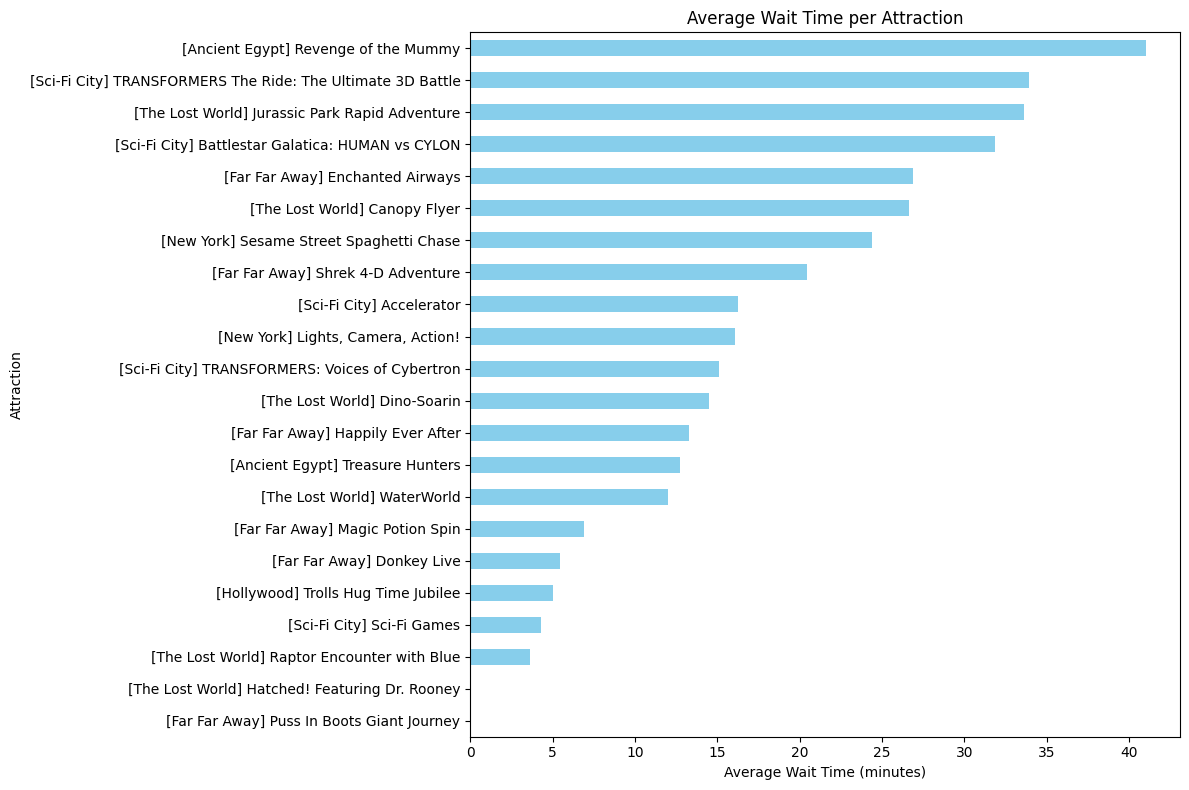

In [4]:
# To keep only the first 5 rows for each ride and filter out any rows with extremely low forecast values,
# we'll group by 'attraction_name' and take the first 5 rows for each group, then filter out low forecasts.

# Group by attraction name and keep the first 5 rows for each attraction
filtered_forecast_data = forecast_data.groupby('attraction_name').head(5)

# Ensure the date column is correctly loaded as datetime
filtered_forecast_data['date'] = pd.to_datetime(filtered_forecast_data['date'], errors='coerce')

# Check for any null values in the date column after conversion
if filtered_forecast_data['date'].isnull().any():
    print("Warning: Some dates could not be parsed. Check for nulls in the date column.")

# Add the 'day_of_week' column based on the 'date' column
filtered_forecast_data['day_of_week'] = filtered_forecast_data['date'].dt.day_name()
# Calculate average wait time per attraction
avg_wait_time_per_attraction = filtered_forecast_data.groupby('attraction_name')['forecast'].mean()

# Filter out attractions with an average wait time of 0
# avg_wait_time_per_attraction = avg_wait_time_per_attraction[avg_wait_time_per_attraction > 0]

# Plot the average wait time for each attraction as a horizontal bar graph, sorted from lowest to highest
plt.figure(figsize=(12, 8))
avg_wait_time_per_attraction.sort_values(ascending=True).plot(kind='barh', color='skyblue')
plt.title('Average Wait Time per Attraction')
plt.xlabel('Average Wait Time (minutes)')
plt.ylabel('Attraction')
plt.tight_layout()
plt.show()


#### Attraction-Based Analysis: Opportunities for Personalization and Service Improvements

##### 1. Targeted Notifications via Mobile App
- Leverage real-time data to inform guests about current wait times for high-demand attractions.

- Guests receive personalized notifications suggesting less crowded attractions they might enjoy based on their preferences (e.g., thrill seekers, families).

##### 2. Personalized Itineraries
- Use historical wait time data to suggest optimized itineraries, helping guests avoid peak times at popular attractions.

- Offer tailored recommendations for less crowded times to visit high-demand attractions, especially beneficial for families with children.

##### 3. Staffing Adjustments
- Allocate additional staff at attractions with consistently high wait times such as Revenge of the Mummy, Transformers etc to enhance guest flow and reduce congestion.

- Adjust staffing levels dynamically based on historical data, focusing on afternoons and weekends when wait times peak.

##### 4. Queue Enhancements
- Improve queue experiences by adding shaded areas, interactive entertainment, or digital screens to keep guests engaged while waiting.

- Consider implementing virtual queue systems for popular attractions, allowing guests to reserve a spot and explore other parts of the park.






---


## 2. Time-Based Patterns

**Objective**: We can explore how journey patterns change based on the time of day, day of the week, or season, which can reveal high-demand times/high wait times and help us make operational adjustments. By identifying peak/off peak timings, we can analyze differences between high and low traffic times, helping to design recommendations for guests to avoid crowded time periods.

- **Time of Day**: Identify patterns based on specific times, such as morning, afternoon, or evening, to see when each attraction has peak traffic.

- **Day of Week** Analyze guest patterns by day of the week to determine if certain days have consistently higher traffic. This can help identify weekly trends, such as weekends drawing larger crowds, and can inform staffing and resource allocation for high-demand days.

- **Seasonality**: Observe changes in patterns based on months in the year, providing insights into how different seasons impact guest flow and attraction popularity. Understanding seasonal trends allows for better planning around high-traffic times, such as summer or holiday seasons.


#### Time of Day

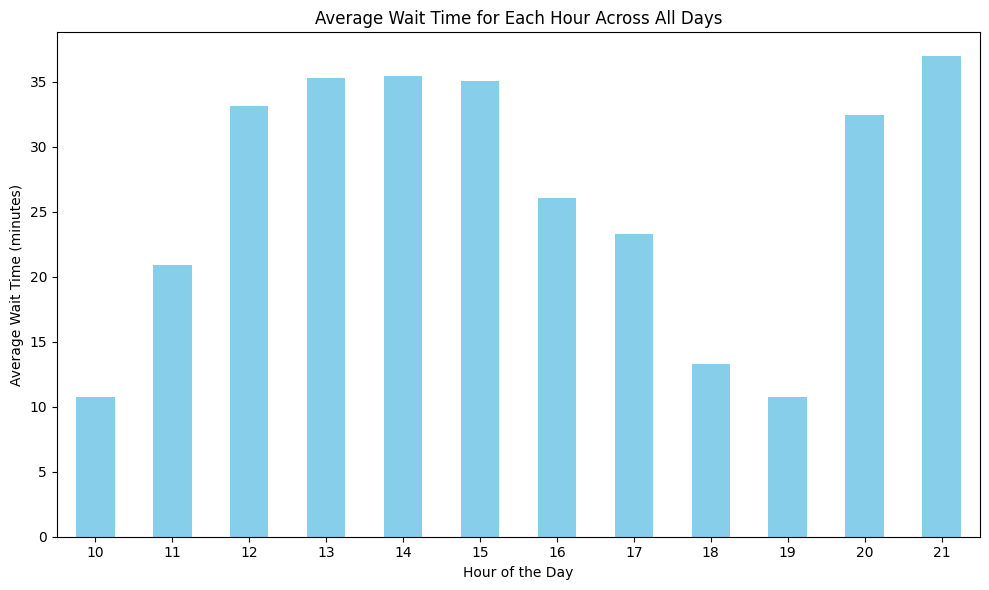

In [5]:
# Round the wait_time to the nearest minute
hourly_wait_time_data['wait_time'] = hourly_wait_time_data['wait_time'].round()

# Filter the data to keep only hours from 10 AM to 9 PM (10 to 21 in 24-hour format)
filtered_daily_wait_time = hourly_wait_time_data[(hourly_wait_time_data['hour'] >= 10) & (hourly_wait_time_data['hour'] <= 21)]
# Calculate the average wait time for each hour of each day
hourly_avg_wait_time = filtered_daily_wait_time.groupby(['date', 'hour'])['wait_time'].mean().reset_index()

# Calculate the average wait time for each hour across all days
hourly_avg_all_days = filtered_daily_wait_time.groupby('hour')['wait_time'].mean()

# Plotting the average wait time for each hour as a bar chart
plt.figure(figsize=(10, 6))
hourly_avg_all_days.plot(kind='bar', color='skyblue')
plt.title('Average Wait Time for Each Hour Across All Days')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Wait Time (minutes)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


#### Day Of Week

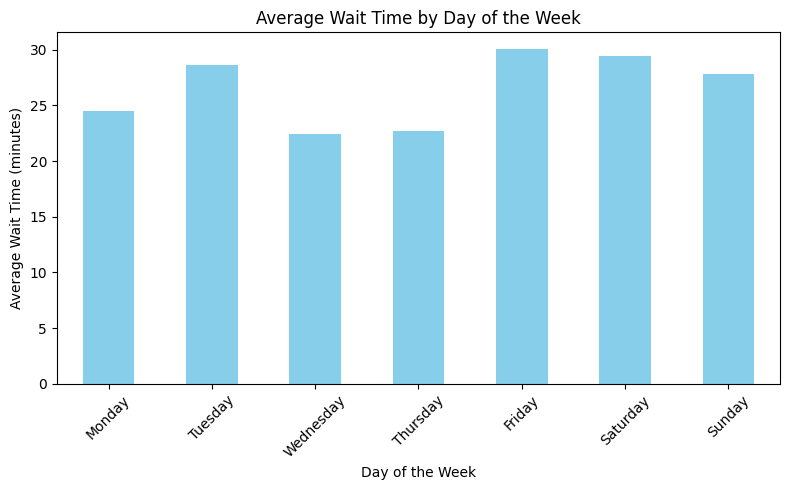

In [6]:
# Assuming your DataFrame is named daily_wait_time_data
# Convert 'date' column to datetime format if it isn't already
daily_wait_time_data['date'] = pd.to_datetime(daily_wait_time_data['date'])

# Add a 'day_of_week' column
daily_wait_time_data['day_of_week'] = daily_wait_time_data['date'].dt.day_name()

# Calculate the average wait time for each day of the week
average_wait_time_by_day = daily_wait_time_data.groupby('day_of_week')['avg_wait_time_day'].mean()

# Display the average wait time by day of the week
average_wait_time_by_day

# Plot the average wait time by day of the week as a bar chart
plt.figure(figsize=(8, 5))
average_wait_time_by_day = average_wait_time_by_day.reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)  # Ensure days are ordered correctly

average_wait_time_by_day.plot(kind='bar', color='skyblue')
plt.title('Average Wait Time by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Wait Time (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Analysis of Wait Time Journey Patterns Across All Years

We have the average daily wait times for USS from 2019 to present.(Note: 2019-2022 dec is synthetic data) We can analyse them to identify long-term trends, seasonal fluctuations, and recurring patterns in guest wait times. 

By plotting both the daily values and a 7-day rolling average, we can smooth out short-term fluctuations and gain insights into broader patterns in visitor traffic. Understanding these trends helps in identifying consistent high-demand periods and potential wait time bottlenecks that impact the overall guest journey.


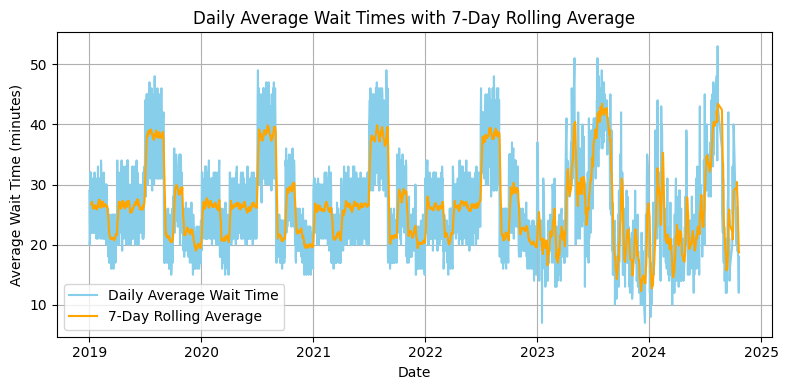

In [7]:
# Convert the date column to datetime format
daily_wait_time_data['date'] = pd.to_datetime(daily_wait_time_data['date'])

# Set date as the index for easier plotting
daily_wait_time_data.set_index('date', inplace=True)

# Plot daily average wait times
plt.figure(figsize=(8,4))
plt.plot(daily_wait_time_data['avg_wait_time_day'], label='Daily Average Wait Time', color='skyblue')

# Add a 7-day rolling average
daily_wait_time_data['7_Day_Rolling_Avg'] = daily_wait_time_data['avg_wait_time_day'].rolling(window=7).mean()
plt.plot(daily_wait_time_data['7_Day_Rolling_Avg'], label='7-Day Rolling Average', color='orange')

# Customize the plot
plt.title('Daily Average Wait Times with 7-Day Rolling Average')
plt.xlabel('Date')
plt.ylabel('Average Wait Time (minutes)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Zoomed-In Analysis of 2023 Wait Time Journey Patterns

To better understand guest journey patterns related to wait times, we analyze daily average wait times specifically for the year 2023 since we have real data for this year. By examining this single year, we can observe seasonal trends, high-traffic periods, and fluctuations that may indicate bottlenecks or peak visitor times. The 7-day rolling average helps smooth out daily variations, revealing underlying patterns in guest wait times throughout the year.


C:\Users\damie\AppData\Local\Temp\ipykernel_22384\3704911642.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wait_time_2023['7_Day_Rolling_Avg'] = wait_time_2023['avg_wait_time_day'].rolling(window=7).mean()


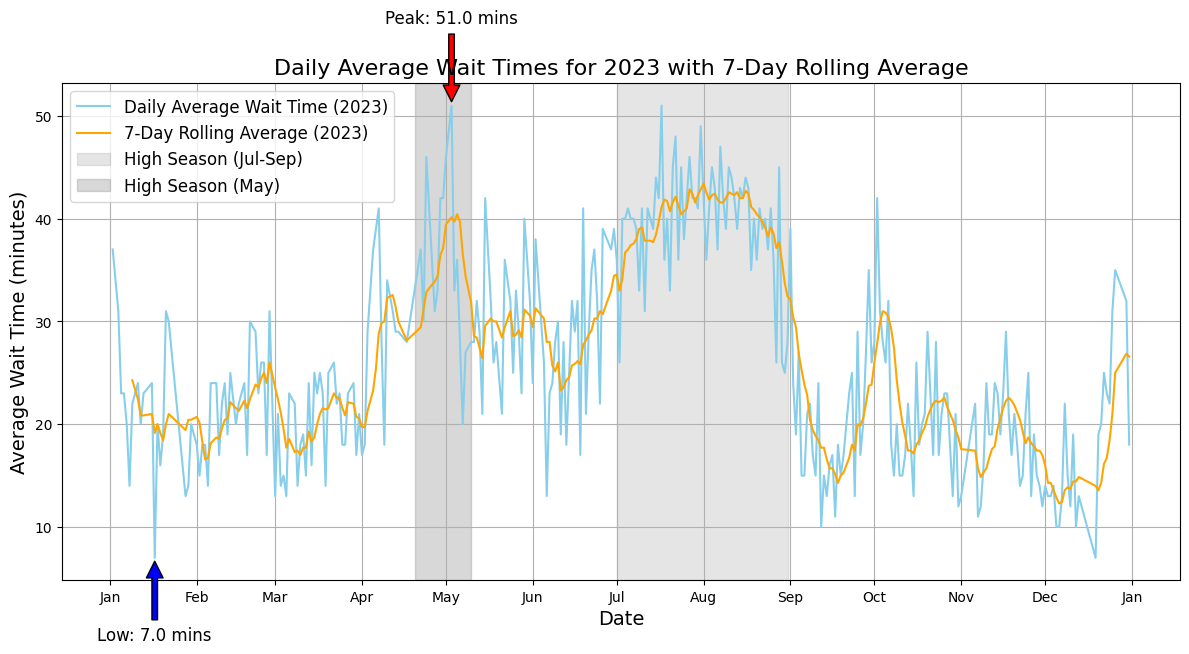

In [8]:
# Filter data for the year 2023
wait_time_2023 = daily_wait_time_data.loc['2023']

# Plot daily average wait times for 2023
plt.figure(figsize=(12, 6))
plt.plot(wait_time_2023['avg_wait_time_day'], label='Daily Average Wait Time (2023)', color='skyblue')

# Add a 7-day rolling average for 2023
wait_time_2023['7_Day_Rolling_Avg'] = wait_time_2023['avg_wait_time_day'].rolling(window=7).mean()
plt.plot(wait_time_2023['7_Day_Rolling_Avg'], label='7-Day Rolling Average (2023)', color='orange')

# Highlight high-season periods
plt.axvspan('2023-07-01', '2023-08-31', color='gray', alpha=0.2, label='High Season (Jul-Sep)')
plt.axvspan('2023-04-20', '2023-05-10', color='gray', alpha=0.3, label='High Season (May)')  # Adding another high season

# Customize the plot with larger fonts
plt.title('Daily Average Wait Times for 2023 with 7-Day Rolling Average', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Average Wait Time (minutes)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()

# Set major ticks to show every month and format them
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Annotate the peak and low points with adjusted position for clarity
max_wait = wait_time_2023['avg_wait_time_day'].max()
min_wait = wait_time_2023['avg_wait_time_day'].min()
max_date = wait_time_2023['avg_wait_time_day'].idxmax()
min_date = wait_time_2023['avg_wait_time_day'].idxmin()

plt.annotate(f'Peak: {max_wait:.1f} mins', xy=(max_date, max_wait), xytext=(max_date, max_wait + 8),
             arrowprops=dict(facecolor='red', shrink=0.05), ha='center', fontsize=12)
plt.annotate(f'Low: {min_wait:.1f} mins', xy=(min_date, min_wait), xytext=(min_date, min_wait - 8),
             arrowprops=dict(facecolor='blue', shrink=0.05), ha='center', fontsize=12)

plt.show()

#### Time-Based Analysis: Opportunities for Personalization and Service Improvements

##### 1. Time of Day Optimization
- **Peak Hours Management**: Utilize historical data to identify peak wait times during the afternoon (12 PM - 4 PM) and evening (7 PM - 9 PM). To alleviate crowd congestion, consider offering early morning or late evening exclusive access to select attractions like Battlestar Galactica and Jurassic Park Rapids Adventure. This can attract guests to visit during off-peak times, spreading out foot traffic more evenly throughout the day.

- **Real-Time Itinerary Adjustments**: Integrate a feature in the Universal Studios Singapore mobile app that dynamically updates guests' itineraries based on real-time wait times. For example, if TRANSFORMERS The Ride experiences a surge in wait time, the app can suggest alternatives like nearby shows or dining options in the Hollywood or Sci-Fi City zones, encouraging guests to explore less crowded areas until the wait time decreases.

##### 2. Day of Week Analysis
- **Weekday Promotions**: Since weekends (Friday to Sunday) show higher wait times, encourage park visits on traditionally quieter weekdays (Monday to Thursday) by offering special deals. For instance, introduce “Midweek Magic” discounts on tickets or express passes to incentivize attendance on off-peak days.

- **Optimized Staff Scheduling**: Allocate additional staff on high-traffic days such as Fridays and weekends to improve ride throughput and guest service. This can be particularly effective for high-demand attractions like Revenge of the Mummy or Puss In Boots’ Giant Journey, ensuring smoother operations and reduced wait times.

##### 3. Seasonal Trends and Event Planning
- **Seasonal Promotions**: Analyze patterns indicating peak months such as July to September and May. Use this data to schedule special events like Summer Splash or Halloween Horror Nights to maintain guest engagement while distributing crowds throughout the day. Offering timed entry slots or afternoon passes can help spread attendance across different times of the day.

- **Holiday Season Adjustments**: During high-demand periods such as the December holidays, consider increasing the frequency of popular shows (like WaterWorld) and extending park hours to accommodate larger crowds. Offering early bird specials or late-night event tickets can draw guests during off-peak times of the day, reducing pressure during peak afternoon hours.


---


## 3. Segment-Specific Patterns

**Objective**: Identify journey patterns across different guest segments, such as families, thrill-seekers, and international tourists, to tailor experiences based on unique behaviors and preferences.

- **Visitor Segmentation**: Use demographic or ticket-type data to categorize guests, which allows for segment-specific pattern analysis.
- **Age and Demographic Influence**: Observe how age and family composition affect journey choices (e.g., families favoring calmer attractions or thrill-seekers preferring high-adrenaline rides).
- **Group Size and Ticket Type**: Analyze if larger groups and VIP guests follow distinct patterns, as larger groups may need more shared spaces, while VIP guests may follow optimized routes.

Based on our Guest Segmentation Model in Qn 2, we have the following clusters:

##### Cluster 0 (High Satisfaction, Young Adult Thrill Seekers)
- **Age Group**: 100% **Young Adults**
- **Gender**: Predominantly **Female** (82.6%)
- **Occupation**: Mostly **Students** (87%) with a few **Employed** (13%)
- **Visitor Profile**: Primarily **Singaporean** (95.7%)

**Insights**:
- This cluster is composed of young, predominantly female, Singaporean students with high satisfaction.
- **Strategy**: Focus on offering thrill-based experiences, loyalty programs, and exclusive events targeting young adults.


##### Cluster 1 (Low Satisfaction, Mixed Family Visitors)
- **Age Group**: 57.1% **Children**, 28.6% **Middle-Aged Adults**, 14.3% **Seniors**
- **Gender**: 100% **Male**
- **Occupation**: Balanced between **Students** (42.9%) and **Retired** (42.9%)
- **Visitor Profile**: Primarily **Tourists** (85.7%)

**Insights**:
- This cluster represents family visitors, predominantly male and tourists, with low satisfaction levels.
- **Strategy**: Improve family-friendly amenities and non-thrill attractions, and enhance the experience for tourists with targeted services.


##### Cluster 2 (Moderate to High Satisfaction, Mixed Young Adults)
- **Age Group**: Primarily **Young Adults** (81.3%) with some **Seniors** (12.5%) and **Middle-Aged Adults** (6.3%)
- **Gender**: Equal split between **Female** and **Male** (50% each)
- **Occupation**: Mostly **Students** (75%), some **Employed** (18.8%), and a few **Retired** (6.3%)
- **Visitor Profile**: Mostly **Singaporean** (93.8%)

**Insights**:
- This cluster consists of mixed young adults with high satisfaction, balanced gender, and a strong local presence.
- **Strategy**: Offer a balanced mix of thrill and non-thrill experiences, and emphasize convenience to retain this high-spending segment.



In [9]:
# Function to assign clusters based on the given conditions
def assign_cluster(row):
    # Cluster 0: Thrill-seeking, high satisfaction, young adult segment
    if row['age'] == '18 - 25' and row['overall_satisfaction'] >= 4 and row['visitor_profile'] == 'Singaporean':
        if row['occupation'] == 'Student' and row['gender'] == 'Female':
            return 'Cluster 0'
    
    # Cluster 1: Low satisfaction, mixed family visitors
    if row['overall_satisfaction'] <= 2 and row['visitor_profile'] == 'Tourist':
        if row['age'] in ['< 18', '36 - 45', '> 55'] and row['gender'] == 'Male':
            return 'Cluster 1'
    
    # Cluster 2: Moderate to high satisfaction, mixed young adults
    if row['overall_satisfaction'] >= 3 and row['age'] in ['18 - 25', '> 55'] and row['visitor_profile'] == 'Singaporean':
        if row['occupation'] in ['Student', 'Employed']:
            return 'Cluster 2'
    
    return None

# Create a new DataFrame for the clustered data
clustered_survey_data = survey_data.copy()

# Apply the function to assign clusters
clustered_survey_data['Cluster'] = clustered_survey_data.apply(assign_cluster, axis=1)

# Drop rows where no cluster was assigned (optional)
clustered_survey_data = clustered_survey_data.dropna(subset=['Cluster'])

# Display the count of each cluster
print(clustered_survey_data['Cluster'].value_counts())

# Save the new clustered data to a CSV file
#clustered_survey_data.to_csv("clustered_survey_data.csv", index=False)

# Display the first few rows of the new DataFrame
clustered_survey_data.head(10)


Cluster
Cluster 2    1514
Cluster 0    1502
Cluster 1      22
Name: count, dtype: int64


,age,gender,occupation,visitor_profile,ticket_purchase_method,ticket_type,special_event_ticket,ticket_purchase_ease,visitor_type,what are your preferred attraction(s)? select all that apply.,...,park_cleanliness,park_seating_availability,restroom_accessibility,overall_satisfaction,which aspect of your visit was the most disappointing? (select all that apply),return_likelihood,recommendation_likelihood,additional_comments,source,Cluster
0,18 - 25,Male,Student,Singaporean,"Third Party Vendor (e.g. Klook, Trip.com)",Regular ticket with Express Pass,No,4,Group,"Thrill Rides, Shows",...,4,Yes,4,4,"Long wait times, Overcrowded attractions",Maybe,Yes,install water cooler given singapore humid cli...,real,Cluster 2
1,18 - 25,Female,Employed,Singaporean,Resort World Sentosa Website,One-day regular ticket,No,4,Group,"Thrill Rides, Special Events (e.g. Halloween H...",...,5,Yes,5,5,NaN,Yes,Yes,everything gd,real,Cluster 2
2,18 - 25,Female,Student,Singaporean,"Third Party Vendor (e.g. Klook, Trip.com)",One-day regular ticket,No,5,Group,Thrill Rides,...,3,No,2,4,"Long wait times, Poor weather conditions, Over...",Yes,Yes,shorter waiting time bench shade around park b...,real,Cluster 0
3,18 - 25,Male,Student,Singaporean,"Third Party Vendor (e.g. Klook, Trip.com)",One-day regular ticket,Yes,3,Group,"Thrill Rides, Shows",...,4,Yes,4,4,Long wait times,Yes,Yes,shorter waiting time,real,Cluster 2
4,18 - 25,Male,Student,Singaporean,Resort World Sentosa Website,One-day regular ticket,No,5,Group,"Thrill Rides, Shows",...,4,No,4,3,"Long wait times, Overcrowded attractions",Maybe,Yes,maybe put aircon waitingqueuing area sheltered...,real,Cluster 2
5,18 - 25,Male,Student,Singaporean,"Third Party Vendor (e.g. Klook, Trip.com)",One-day regular ticket,No,4,Group,Thrill Rides,...,4,Yes,3,4,Long wait times,Maybe,Yes,less queue less queue,real,Cluster 2
6,18 - 25,Male,Student,Singaporean,"Third Party Vendor (e.g. Klook, Trip.com)",One-day regular ticket,Yes,5,Group,Special Events (e.g. Halloween Horror Nights),...,4,Yes,4,3,"Long wait times, Limited dining options, Overc...",No,No,lesser wait time accessible manage wait time b...,real,Cluster 2
7,18 - 25,Female,Student,Singaporean,"Third Party Vendor (e.g. Klook, Trip.com)",One-day regular ticket,Yes,5,Group,"Thrill Rides, Special Events (e.g. Halloween H...",...,3,No,3,4,"Long wait times, Overcrowded attractions",Maybe,Yes,shorter queue sheltered walkway improved queue...,real,Cluster 0
8,18 - 25,Male,Student,Singaporean,"Third Party Vendor (e.g. Klook, Trip.com)",One-day regular ticket,Yes,5,Family,"Thrill Rides, Kid-friendly, Shows, Food and Sh...",...,5,No,3,4,"Long wait times, Overcrowded attractions",Maybe,Yes,faster queue time better queue management chea...,real,Cluster 2
9,18 - 25,Female,Student,Singaporean,"Third Party Vendor (e.g. Klook, Trip.com)",One-day regular ticket,Yes,5,Group,Special Events (e.g. Halloween Horror Nights),...,5,No,4,5,Long wait times,Yes,Yes,shorter waiting time fan shorter waiting time,real,Cluster 0


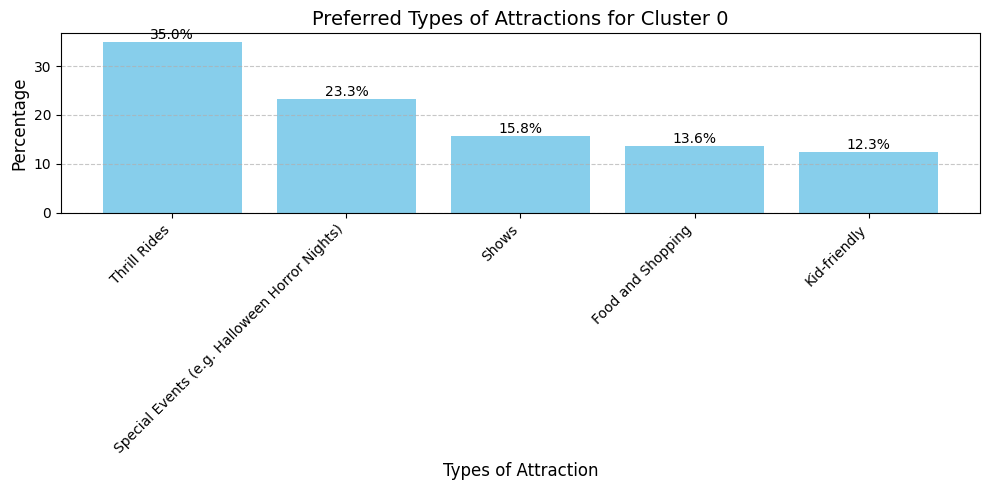

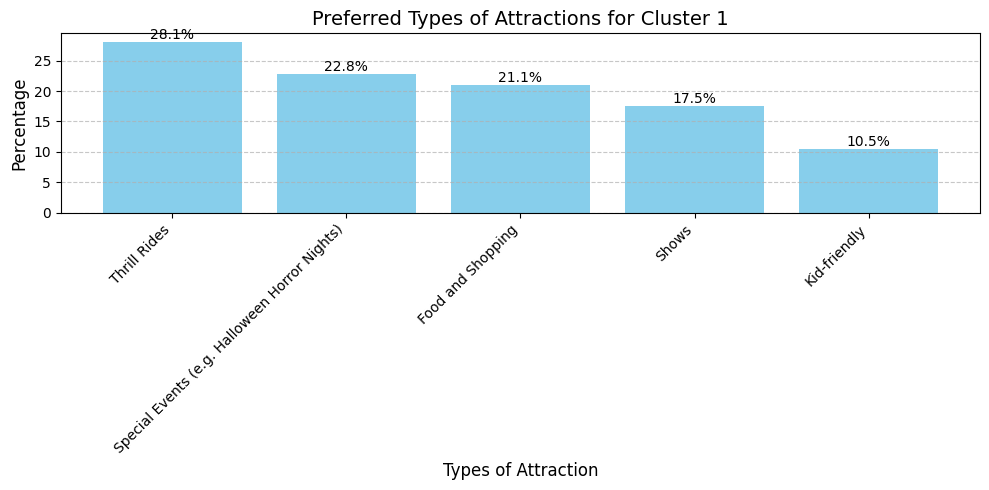

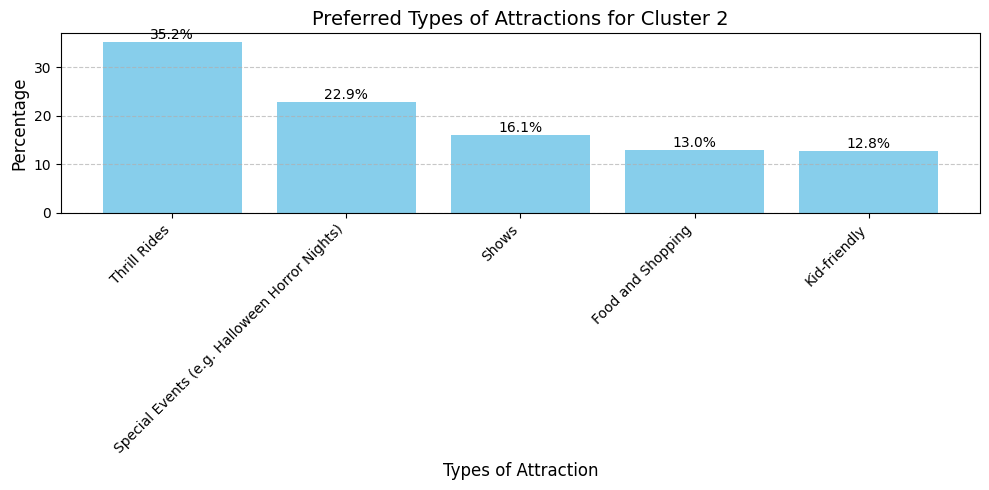

In [10]:

# Define clusters and sort them to ensure the order is 0, 1, 2
clusters = sorted(clustered_survey_data['Cluster'].unique())

# Function to process MRQs and plot preferred attractions for each cluster
def plot_preferred_attractions(cluster_data, cluster_number):
    # Initialize a counter to count individual attractions
    attraction_counter = Counter()
    
    # Iterate through the 'what are your preferred attraction(s)? select all that apply.' column
    for response in cluster_data['what are your preferred attraction(s)? select all that apply.']:
        if pd.notna(response):  # Skip NaN entries
            # Split the response into individual attractions by commas, then strip whitespace
            attractions_list = [attr.strip() for attr in response.split(',')]
            # Update the counter with each individual attraction
            attraction_counter.update(attractions_list)

    # Convert the counter to a DataFrame for easier plotting
    attraction_counts = pd.DataFrame(attraction_counter.items(), columns=['Attraction', 'Count'])
    
    # Sort the DataFrame by count in descending order
    attraction_counts = attraction_counts.sort_values(by='Count', ascending=False)
    
    # Calculate percentages
    total = attraction_counts['Count'].sum()
    attraction_counts['Percentage'] = (attraction_counts['Count'] / total) * 100

    # Plot the bar chart
    plt.figure(figsize=(10, 5))
    bars = plt.bar(attraction_counts['Attraction'], attraction_counts['Percentage'], color='skyblue')

    # Add percentages on top of the bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.1f}%', ha='center', va='bottom', fontsize=10)

    # Customize the plot
    plt.title(f'Preferred Types of Attractions for {cluster_number}', fontsize=14)
    plt.xlabel('Types of Attraction', fontsize=12)
    plt.ylabel('Percentage', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Generate bar charts for each cluster in the correct sequence
for cluster in clusters:
    cluster_data = clustered_survey_data[clustered_survey_data['Cluster'] == cluster]
    plot_preferred_attractions(cluster_data, cluster)


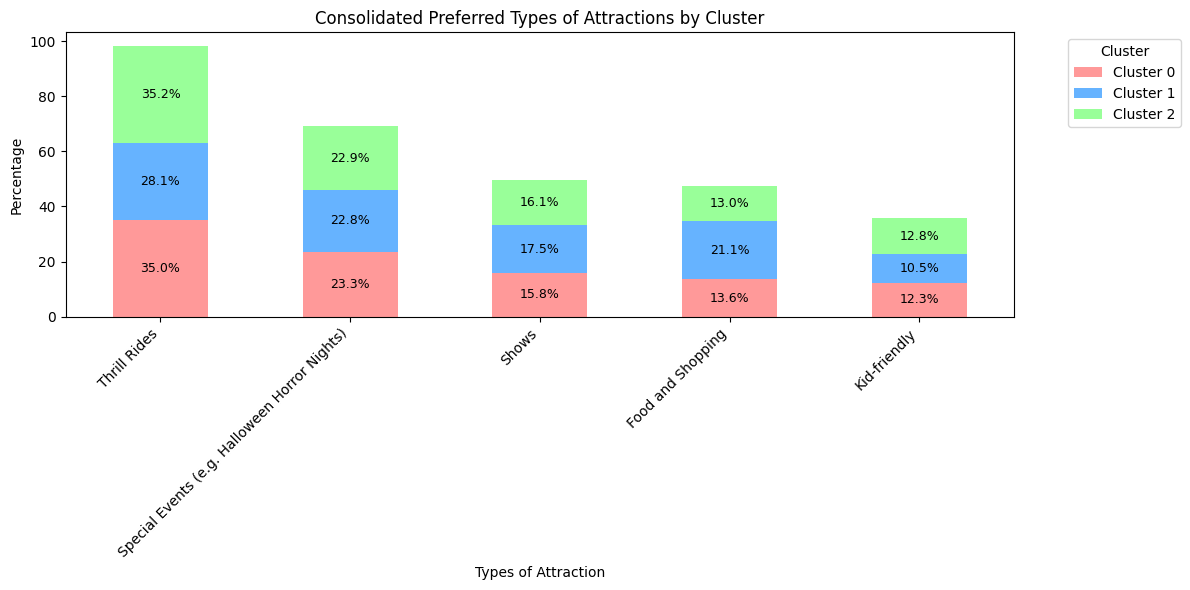

In [11]:
# Define clusters and sort them to ensure the order is 0, 1, 2
clusters = sorted(clustered_survey_data['Cluster'].unique())

# Initialize an empty DataFrame to store attraction preferences for each cluster
cluster_preferences = pd.DataFrame()

# Process each cluster to compute percentages and add them to the DataFrame
for cluster_number in clusters:
    cluster_data = clustered_survey_data[clustered_survey_data['Cluster'] == cluster_number]
    attraction_counter = Counter()

    # Count each attraction preference within the cluster
    for response in cluster_data['what are your preferred attraction(s)? select all that apply.']:
        if pd.notna(response):
            attractions_list = [attr.strip() for attr in response.split(',')]
            attraction_counter.update(attractions_list)
    
    # Convert to DataFrame, calculate percentages, and add cluster identifier
    attraction_counts = pd.DataFrame(attraction_counter.items(), columns=['Attraction', 'Count'])
    total = attraction_counts['Count'].sum()
    attraction_counts['Percentage'] = (attraction_counts['Count'] / total) * 100
    attraction_counts['Cluster'] = f'{cluster_number}'
    
    # Append to the cluster preferences DataFrame
    cluster_preferences = pd.concat([cluster_preferences, attraction_counts])

# Pivot the data to have clusters as columns and attractions as rows
stacked_data = cluster_preferences.pivot(index='Attraction', columns='Cluster', values='Percentage').fillna(0)

# Calculate total percentage for each attraction and sort by descending order
stacked_data['Total'] = stacked_data.sum(axis=1)
stacked_data = stacked_data.sort_values(by='Total', ascending=False)
stacked_data = stacked_data.drop(columns='Total')  # Remove 'Total' column after sorting

# Plot the sorted stacked column chart
fig, ax = plt.subplots(figsize=(12, 6))
bars = stacked_data.plot(kind='bar', stacked=True, ax=ax, color=['#ff9999','#66b3ff','#99ff99'])
plt.title('Consolidated Preferred Types of Attractions by Cluster')
plt.xlabel('Types of Attraction')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Add individual percentages as text labels within each bar
for i, attraction in enumerate(stacked_data.index):
    cumulative = 0
    for cluster in stacked_data.columns:
        value = stacked_data.loc[attraction, cluster]
        if value > 0:
            ax.text(i, cumulative + value / 2, f'{value:.1f}%', ha='center', va='center', color='black', fontsize=9)
        cumulative += value

plt.show()

#### Consolidated Preferred Types of Attractions by Cluster
The above stacked column chart shows the disparity in percentage of preferred attractions across different clusters, with each column showing the combined preferences of visitors segmented by cluster groups. Each segment within a column corresponds to a specific cluster and shows the percentage of visitors in that cluster who preferred a particular attraction. The total height of each column represents the combined preferences across all clusters, giving a quick visual of the overall popularity of each attraction while showing how preferences vary among different groups.

The purpose of this chart is to:
- **Highlight Overall Popularity**: By ordering attractions from highest to lowest based on total preference, the chart quickly shows which attractions are the most popular across all clusters.
- **Reveal Cluster-Specific Preferences**: The color-coded segments within each column let you see how preferences vary across different clusters. For example, one cluster may have a stronger preference for a particular attraction than another, which might indicate differences in interests between groups.
- **Aid in Targeted Marketing**: Understanding the attractions that different clusters prefer helps in tailoring marketing strategies to cater to each segment's preferences. For instance, attractions with high preference among tourists might be promoted more heavily in travel brochures, while those preferred by Singaporeans could be featured in local campaigns.

In summary, the chart provides both a high-level overview of attraction popularity and a detailed view of cluster-specific preferences, making it a valuable tool for analyzing visitor behavior and planning effective marketing strategies.

#### Age Influence
In addition, as we have the age of the visitors who completed our survey, we are able to find out the demographics of visitors that visit Universal Studios Singapore. With this analysis, we can tailor experiences, marketing, and operational decisions. 

For instance, we can see that most of our visitors are aged 18 - 25. With this information, we can do more social media advertising on platforms like Instagram or TikTok. To increase the count of visistors aged 36 - 45, we can consider email campaigns or advertisements through family-oriented channels. 

*However, the data in the survey is not fully representative of the actual demographics, as there are many visitors of various age groups who declined to do our survey.

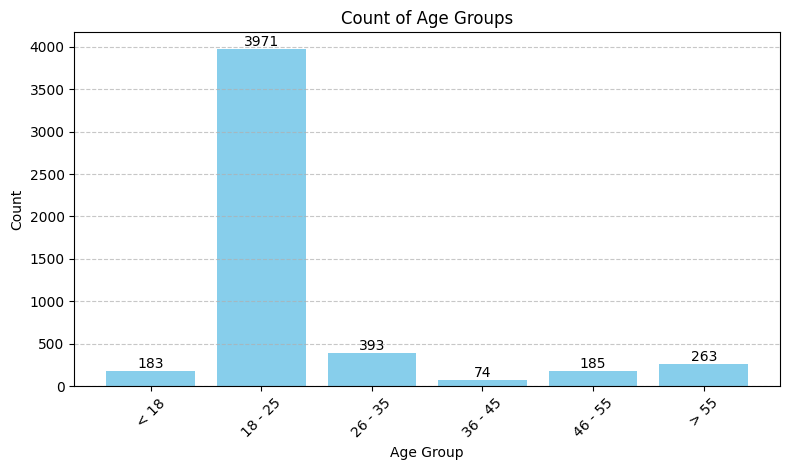

In [12]:
age_counts = survey_data['age'].value_counts()
#print(age_counts)

# Defining in ascending order
custom_order = ['< 18', '18 - 25', '26 - 35', '36 - 45', '46 - 55', '> 55']

age_counts = age_counts.reindex(custom_order, fill_value=0)

# Plotting
plt.figure(figsize=(8,4.8))
bars = plt.bar(age_counts.index, age_counts.values, color='skyblue')

# Adding counts on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

plt.title('Count of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout
plt.show()

#### Age Group and their Interest

With a question in the survey being "What are your preferred attractions?", we are able to find out which attraction of Universal Studios Singapore are our visitors attracted to. Some of this attraction includes thrill ride, shows, and special events. By analysing by age group, we are able to understand what attracts different age groups to Universal Studios Singapore. 

For instance, we can see that thrill rides are what attracts everyone of different age groups. This can help Universal Studios Singapore to prioritise the expansion or enhancement of these rides with more innovative technology or new themes. Special events come in second. Universal Studios Singapore can consider organising more events such as during Chinese New Year or Valentine's Day to increase their revenue.

#### Segment-Based Analysis: Opportunities for Personalization and Service Improvements

##### Cluster 0 (Thrill Seekers): This cluster shows a strong preference for thrill rides (35%) and special events (23%), with moderate interest in shows and food options.  

**Personalization Strategies**: 
- Exclusive access: Introduce Express Passes specifically targeting popular thrill rides for this group to minimize their wait times.

- Personalized alerts: Send push notifications about upcoming thrill events or newly introduced rides, ensuring they are the first to know about any new additions.

- Special events: Offer behind-the-scenes experiences for popular rides or previews for Halloween nights and other seasonal events.


**Service Improvements**:
- Enhanced queue experience: Add interactive elements or entertainment screens in queue lines to improve their waiting experience.

- In-app ride recommendations: Use app-based ride recommendations to direct them to less crowded thrill rides to optimize their time in the park.


##### Cluster 1 (Mixed Preferences) This cluster prefers a mix of thrill rides (28%), special events (22%), and food & shopping (21%), with a noticeable interest in shows and family-friendly attractions.  

**Personalization Strategies**:
- Balanced itineraries: Create a personalized itinerary that includes a mix of thrill rides, special events, and food and shopping breaks to cater to their diverse interests.

- Family packages: Offer family-oriented packages that include discounted meal vouchers and express passes for family-friendly attractions.

- Exclusive offers: Provide seasonal discounts on merchandise and dining, especially during popular special events.

**Service Improvements**:
- Enhanced food & shopping experience: Add mobile ordering options and pre-booked dining slots to reduce wait times for food, especially during peak hours.

- Guided tours: Introduce guided park tours that combine shows, attractions, and shopping stops, tailored to this group’s preferences.


##### Cluster 2 (Balanced Thrill Seekers) This cluster is also inclined toward thrill rides (35%), followed by special events (23%) and shows (16%), with significant interest in food and shopping.  

**Personalization Strategies**:
- Dynamic itinerary suggestions: Utilize park data to recommend a balanced itinerary that includes thrill rides, shows, and shopping breaks, focusing on times when these attractions have lower wait times.

- VIP experience: Offer VIP passes or priority seating for shows to enhance their satisfaction, especially since this group tends to be high-spending.

- Seasonal merchandise: Curate limited-edition merchandise related to special events like Halloween, catering to their interest in unique experiences.

**Service Improvements**:
- Integrated experience: Provide seamless transitions between thrill rides and shows by using the app to notify them of showtimes after completing nearby rides.

- Flexible dining options: Introduce express dining services where guests can order ahead while in line for rides, ensuring their meal is ready when they finish.

---


## Conclusion

Through our detailed analysis of guest journey patterns at Universal Studios Singapore, we have identified three distinct clusters of visitors with unique preferences and behaviors. By leveraging insights from attraction-based, time-based, and segment-specific patterns, we have pinpointed opportunities to personalize experiences and improve services to better meet the needs of each cluster.

1. Attraction-Based Patterns:
Thrill rides and special events are consistently popular across all clusters. Implementing strategies like exclusive access to thrill rides, dynamic itineraries, and guided tours can enhance the park experience for both thrill-seekers and families.

2. Time-Based Patterns:
Analyzing time-based patterns revealed peaks in guest traffic at certain hours, days, and seasons. Using these insights to adjust staffing, optimize queue management, and offer special incentives during off-peak hours can help smooth out guest flow. Additionally, personalized notifications and itinerary suggestions during quieter times can reduce congestion and boost guest satisfaction.

3. Segment-Specific Patterns:
Each cluster represents distinct demographics and behaviors that can be addressed through tailored strategies. For Cluster 0, composed mostly of young, thrill-seeking locals, the focus should be on exclusive events and fast-track access to popular rides. Cluster 1, with a higher proportion of tourists and families, would benefit from enhancements in family-friendly services and amenities. Meanwhile, Cluster 2, a high-spending segment with balanced interests, would appreciate convenience-oriented services like express dining and VIP access to shows.

By focusing on these strategies, Universal Studios Singapore can create truly memorable and personalized experiences that keep guests coming back, ultimately enhancing its revenue and upholding its reputation as a top destination for theme park enthusiasts.
